<a href="https://colab.research.google.com/github/DevVagabond/tensorflow-ml-templates/blob/main/Tensorflow_CNN_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food detection with CNN


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-03-20 12:35:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.163.207, 74.125.142.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   200MB/s    in 0.5s    

2025-03-20 12:35:28 (200 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

number_of_steak_image_train = len(os.listdir("pizza_steak/train/steak"))
number_of_steak_image_test = len(os.listdir("pizza_steak/test/steak"))

number_of_pizza_image_train = len(os.listdir("pizza_steak/train/pizza"))
number_of_pizza_image_test = len(os.listdir("pizza_steak/test/pizza"))

number_of_pizza_image_train, number_of_steak_image_train , number_of_pizza_image_test, number_of_steak_image_test

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


(750, 750, 250, 250)

In [ ]:
import pathlib

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image_path = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image_path[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img





Image shape: (384, 512, 3)


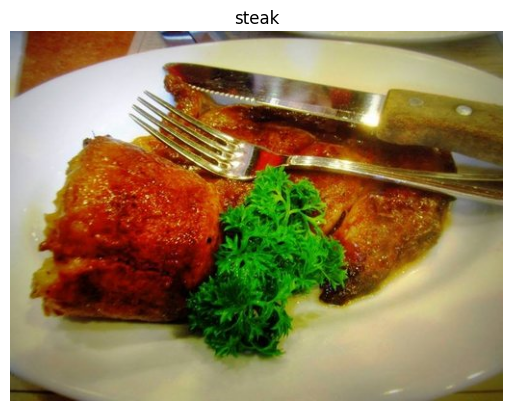

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [ ]:
tf.constant(img)

img = img/255

img

array([[[0.38039216, 0.44313725, 0.53333333],
        [0.38039216, 0.44705882, 0.5254902 ],
        [0.39607843, 0.44313725, 0.52941176],
        ...,
        [0.36862745, 0.38823529, 0.37254902],
        [0.36470588, 0.38823529, 0.38823529],
        [0.36470588, 0.38823529, 0.38823529]],

       [[0.40392157, 0.46666667, 0.55686275],
        [0.40392157, 0.47058824, 0.54901961],
        [0.41960784, 0.46666667, 0.55294118],
        ...,
        [0.36078431, 0.37647059, 0.37254902],
        [0.36862745, 0.39215686, 0.39215686],
        [0.37647059, 0.4       , 0.4       ]],

       [[0.43137255, 0.49411765, 0.58431373],
        [0.43529412, 0.50196078, 0.58039216],
        [0.44705882, 0.49411765, 0.58039216],
        ...,
        [0.34901961, 0.37254902, 0.36470588],
        [0.37254902, 0.39607843, 0.39607843],
        [0.39215686, 0.41568627, 0.41568627]],

       ...,

       [[0.32941176, 0.30196078, 0.09803922],
        [0.33333333, 0.30588235, 0.09411765],
        [0.34117647, 0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#set the seed
tf.random.set_seed(42)

#generate augmented image data with specific shape and feature scalled

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#setup path to directory of training data

train_path = "pizza_steak/train"
test_path = "pizza_steak/test"

#import data and turn them into batches

train_data =train_datagen.flow_from_directory(
    directory=train_path,
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    seed=42
)

test_data = test_datagen.flow_from_directory(
    directory=test_path,
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    seed=42
)

model_cnn_v1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_cnn_v1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#we do nothave to pass feature and label matrix seperately X_train,y_train, the image data generator function generates both feature and label data together

model_cnn_v1.fit(train_data,epochs=10,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.5567 - loss: 0.6670 - val_accuracy: 0.7660 - val_loss: 0.5014
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.7550 - loss: 0.5065 - val_accuracy: 0.8120 - val_loss: 0.4297
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.7939 - loss: 0.4651 - val_accuracy: 0.8340 - val_loss: 0.3839
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.8168 - loss: 0.4280 - val_accuracy: 0.8320 - val_loss: 0.4268
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7994 - loss: 0.4312 - val_accuracy: 0.8400 - val_loss: 0.3909
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8465 - loss: 0.3653 - val_accuracy: 0.8620 - val_loss: 0.3684
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.8976 - loss: 0.2882 - val_accuracy: 0.8220 - val_loss: 0.3884
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9258 - loss: 0.2292 - val_accuracy: 0.8080 - va

In [ ]:
train_data.class_indices

{'pizza': 0, 'steak': 1}

In [ ]:
model_cnn_v1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8064 - loss: 0.6246


[0.5881975889205933, 0.8019999861717224]

CNN resources: https://poloclub.github.io/cnn-explainer/.     

https://adamharley.com/nn_vis/cnn/3d.html




In [ ]:
#predict random image from  directory path
def predict_image(img_path):
  img = mpimg.imread(img_path)
  img = tf.constant(img)
  img = tf.image.resize(img,size=(224,224))
  img = img/255
  img = tf.expand_dims(img,axis=0)
  prediction = model_cnn_v1.predict(img)
  if prediction > 0.5:
    return "steak"
  else:
    return "pizza"






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
pizza


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
steak


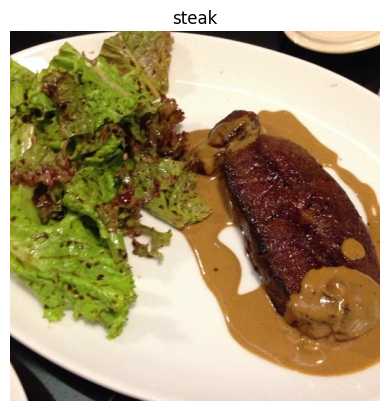

In [ ]:
data_paths = ["pizza_steak/test/pizza/","pizza_steak/test/steak/"]

random_class = random.randint(0,1);

prediction_path = data_paths[random_class];

random_number = random.randint(0,len(os.listdir(prediction_path)))
plt.imshow(mpimg.imread(prediction_path + os.listdir(prediction_path)[random_number]))
plt.title(predict_image(prediction_path + os.listdir(prediction_path)[random_number]))
plt.axis("off")

print(pred)